In [1]:
%matplotlib inline
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature

In [2]:
npd = npy.NumpyDirectory('/data/detectors/2016-11-08_184143_Tc/')

In [4]:
npd.node_names()

['sweep']

In [6]:
sweep = npd.sweep

In [8]:
temperature.add_temperature(sweep, cryostat='hpd')

In [9]:
sweep.stream_arrays[-1].state

StateDict({u'signal_conditioner': StateDict({u'adc_chain_gain': 0.0, u'description': u'Mark II 0.5-4 GHz', u'dac_chain_gain': -39}), 'temperature': StateDict({'load': 2.6342508262082163, 'package': 1.7668224370143815})})

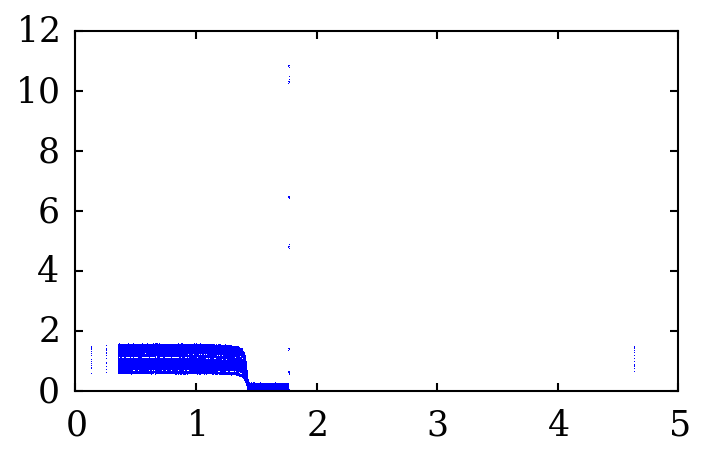

In [11]:
fig, ax = plt.subplots()

for channel in range(sweep.num_channels):
    for sa in sweep.stream_arrays:
        ax.plot(sa.state.temperature.package, np.abs(sa[channel].s21_point), ',b')

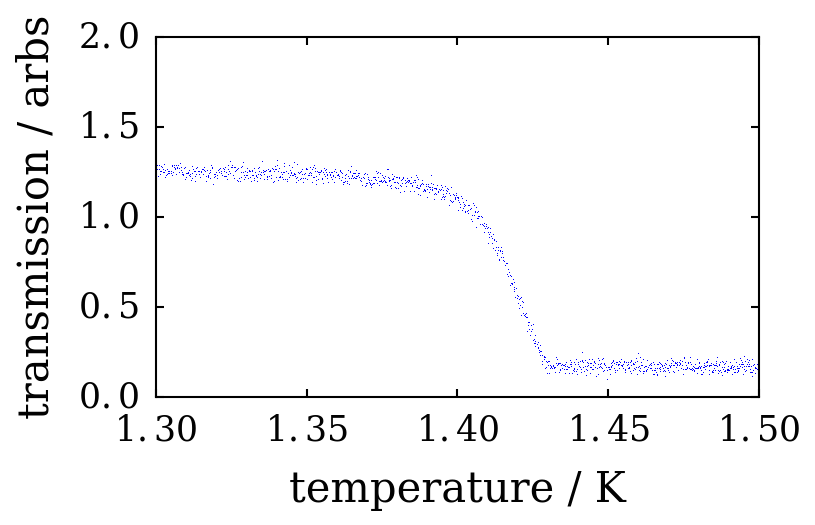

In [14]:
channel = 0

fig, ax = plt.subplots()
ax.set_xlabel('temperature / K')
ax.set_ylabel('transmission / arbs')

for sa in sweep.stream_arrays:
    ax.plot(sa.state.temperature.package, np.abs(sa[channel].s21_point), ',b')

ax.set_xlim(1.3, 1.5)
ax.set_ylim(0, 2);